In [1]:
!pip install mediapipe


  Using cached mediapipe-0.8.9-cp39-cp39-win_amd64.whl (48.6 MB)
  Using cached matplotlib-3.5.0-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached numpy-1.21.4-cp39-cp39-win_amd64.whl (14.0 MB)
  Using cached attrs-21.2.0-py2.py3-none-any.whl (53 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
  Using cached protobuf-3.19.1-cp39-cp39-win_amd64.whl (895 kB)
  Using cached opencv_contrib_python-4.5.4.60-cp39-cp39-win_amd64.whl (42.0 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached kiwisolver-1.3.2-cp39-cp39-win_amd64.whl (52 kB)
  Using cached setuptools_scm-6.3.2-py3-none-any.whl (33 kB)
  Using cached pyparsing-3.0.6-py3-none-any.whl (97 kB)
  Using cached Pillow-8.4.0-cp39-cp39-win_amd64.whl (3.2 MB)
  Using cached fonttools-4.28.3-py3-none-any.whl (884 kB)
  Using cached tomli-1.2.2-py3-none-any.whl (12 kB)


In [4]:
!pip install opencv-python

  Using cached opencv_python-4.5.4.60-cp39-cp39-win_amd64.whl (35.1 MB)


In [3]:
!pip install matplotlib

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mp_self=mp.solutions.selfie_segmentation

In [3]:
mp_self.SelfieSegmentation??

In [4]:
cap = cv2.VideoCapture(0)
with mp_self.SelfieSegmentation(model_selection=0) as model:
    while cap.isOpened():
        ret,frame = cap.read()
        
        #Segmentation
        frame.flags.writeable=False
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        res = model.process(frame)
        frame.flags.writeable=True
        
        cv2.imshow("OPENCV",cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

In [5]:
#process result
background = np.zeros(frame.shape, dtype=np.uint8)
mask=np.stack(np.array([res.segmentation_mask]*3),axis=2)>0.5

#print(result)

segmented_image = np.where(mask, frame, background)
#print(seg.shape)

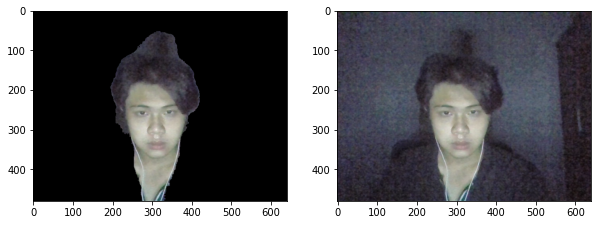

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(segmented_image)
plt.subplot(1,2,2)
plt.imshow(frame)

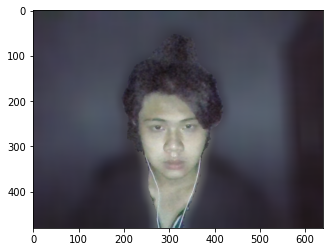

In [7]:
seg = np.where(mask,frame,cv2.blur(frame,(40,40)))
plt.imshow(seg)

In [8]:
def process(res,frame):
    mask=np.stack(np.array([res.segmentation_mask]*3),axis=2)>0.5
    seg = np.where(mask,frame,cv2.blur(frame,(40,40)))
    return seg
    

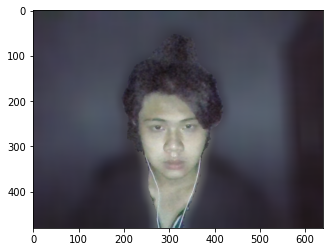

In [9]:
a=process(res,frame)
plt.imshow(a)

In [10]:
cap = cv2.VideoCapture(0)
with mp_self.SelfieSegmentation(model_selection=0) as model:
    while cap.isOpened():
        ret,frame = cap.read()
        res = model.process(frame)
        seg_img=process(res,frame)
        cv2.imshow("OPENCV",seg_img)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
        
        

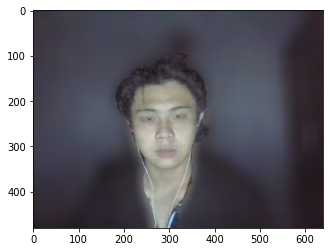

In [11]:
plt.imshow(cv2.cvtColor(seg_img,cv2.COLOR_BGR2RGB))

In [12]:
#Build Gradio App

In [13]:
#!pip install gradio

In [14]:
import gradio as gr

In [15]:
def segment(image): 
    with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
        res = model.process(image)
        mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 
        return np.where(mask, image, cv2.blur(image, (40,40)))

In [16]:
webcam = gr.inputs.Image(shape=(640, 480), source="webcam")


In [17]:
webapp = gr.interface.Interface(fn=segment, inputs=webcam, outputs="image")


In [18]:
webapp.launch()

IMPORTANT: You are using gradio version 2.4.6, however version 2.5.1 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)